**Goal** 

Time series of DSWE inundated area for each delineated region and stream stage in one pandas dataframe for LeveeID 3905550001

**Completed for one levee**

* Download historical stream stage data associated with levee (using dates and gage ID). E:\NLD_DSWE\data\Gages.xlsx using python. (https://github.com/USGS-python/dataretrieval, https://help.waterdata.usgs.gov/code/parameter_cd_query?fmt=rdb&group_cd=PHY&inline=true). Save as a .csv and read it into a Jupyter Notebook
* This file has stream gages associated with each levee, needs to be checked: E:\NLD_DSWE\data\Gages.xlsx Use to download stream gage data using either R or python. 

## Instructions ##
* In Google Earth Engine, using zonalStats function and USGS code (https://www.sciencebase.gov/catalog/item/5e28b8d8e4b0d3f93b05fe4a), extract a time series of DSWE percent inundated area (output should be a csv file of date and innundated area for each of the leveed areas). Read .csv into Jupyter Notebook 
* Pandas merge stream stage and inundated area by date, retaining all stream stage data without corresponding inundated area.
* More info:
** Use Google EarthEngine to get Landsat data, calculate DSWE categories using the USGS script link. This will be the trickiest part, as you'll have to get the exact timestamp for the Landsat image capture and the percent innundated area into a single dataframe. There will be a lot of nuance around how we'll handle clouds here. Use Google and stack exchange, online tutorials and google earth engine tutorials.
** You'll very quickly learn a little more about ways to use spatial vector data (points, lines, and polygons) to filter searches in EarthEngine.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import numpy as np
import earthpy as et
import earthpy.plot as ep
import geopandas as gpd

In [2]:
#copy file path, then double the backslash.
os.chdir('E:\\NLD_DSWE\\data')
#os.listdir()

In [3]:
gage = pd.read_csv('gages.csv')
gage.head(8)
#gage.loc[gage['LeveeID'] == 3905550001, 'MainGage'] gets main gage for a specific levee from the csv
print(gage.loc[gage['LeveeID'] == 3905550001, 'MainGage'] + " is the gage")

89    3351000 is the gage
Name: MainGage, dtype: object


In [4]:
#must run in powershell: pip install -U dataretrieval
    # import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

**Why are the USGS stream gage sites missing this first digit?**

*I added one in front of the site here, but that will not work for all sites*

In [5]:
# specify the USGS site code for which we want data.
site = '13351000'
    # get instantaneous values (iv)
df = nwis.get_record(sites='13351000', service='iv', start='2017-12-31', end='2018-01-01')
    # get basic info about the site
nwis.get_record(sites='13351000', service='measurements', start='2017-12-31', parameterCd='00060')

#I will also save this as a CSV when ready

#here I use 'iv' for instantaneous values. Can also get:
    #daily values (dv), statistics (stat), site info (site)
    #discharge peaks (peaks), discharge measurements (measurements), water quality samples (qwdata)

,agency_cd,site_no,measurement_nu,measurement_dt,tz_cd,q_meas_used_fg,party_nm,site_visit_coll_agency_cd,gage_height_va,discharge_va,measured_rating_diff,gage_va_change,gage_va_time,control_type_cd,discharge_cd
0,USGS,13351000,566,2018-01-17 12:51:00,PST,Yes,JCG,USGS,8.72,2700.0,Good,0.01,0.40,Clear,NONE
1,USGS,13351000,567,2018-05-18 13:51:00,PDT,Yes,JCG,USGS,5.56,572.0,Good,0.00,0.50,Clear,NONE
2,USGS,13351000,568,2018-08-02 11:54:00,PDT,Yes,JCG,USGS,3.40,67.7,Fair,0.00,1.30,Clear,NONE
3,USGS,13351000,569,2018-10-18 16:11:30,PDT,Yes,KLC/HLC,USGS,3.65,89.4,Fair,0.00,NaN,Clear,NONE
4,USGS,13351000,570,2018-10-18 16:18:30,PDT,Yes,KLC/HLC,USGS,3.65,91.7,Fair,0.00,0.82,Clear,NONE
5,USGS,13351000,571,2019-01-30 12:11:30,PST,Yes,HLC/JCG,USGS,5.53,598.0,Good,0.00,0.28,Clear,NONE
6,USGS,13351000,572,2019-01-30 14:35:30,PST,Yes,HLC/JCG,USGS,5.51,590.0,Good,0.00,0.25,Clear,NONE
7,USGS,13351000,573,2019-04-11 11:28:24,PDT,Yes,NFE,USGS,12.59,8710.0,Fair,0.02,0.50,DebrisLight,NONE
8,USGS,13351000,574,2019-06-11 12:44:42,PDT,Yes,NFE,USGS,4.88,345.0,Good,0.01,0.25,Clear,NONE
9,USGS,13351000,575,2019-07-17 15:42:58,PDT,Yes,NFE/WRE,USGS,3.75,110.0,Good,0.00,0.30,Clear,NONE


In [6]:
#to read the levee shapefile already saved
gpd.read_file('E:\\NLD_DSWE\\data\\RDME_Levees\\FullFinalLeveeList\\3905550001\\3905550001.shp')
#I want to load at least one of these polygons into GEE as the perimeter for the data I'll download from
#https://earthexplorer.usgs.gov/

,Id,Polygon,LeveeID,Which,geometry
0,0,D,3905550001,None,"POLYGON ((-86.20807 39.83252, -86.20365 39.840..."
1,0,U,3905550001,None,"POLYGON ((-86.14253 39.86864, -86.13972 39.871..."
2,0,A,3905550001,None,"POLYGON ((-86.18771 39.85740, -86.17544 39.866..."
3,0,S,3905550001,None,"POLYGON ((-86.16405 39.85299, -86.16354 39.852..."
4,0,P,3905550001,None,"POLYGON ((-86.14036 39.87091, -86.14030 39.870..."


 #### Note about issue with Google Earth Engine manual download on website: ####
 Shapefile uploaded to Google Earth Engine must be a Zipfile that contains:
        (.shp) (.shx) (.dbf).optional (.prj).
 But when I copied levee and removed other things besides what is listed above and saved as a zipfile, error message now reads "Please limit your Shapefile to one polygon/polyline."
There is more than one polygon in the shapefile.

In [7]:
#To work through the error with import ee, used command: conda install -c conda-forge earthengine-api
#then I did import ee on the command
#Then used the command here: earthengine authenticate
#This following code will ask you to log into Google Earth Engine with email and paste a code

import ee
ee.Initialize()

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

Enter verification code: 4/1AX4XfWhrRQ5-K9RG7rBDdDVWNeHj8Uxe44hFv320OwquDJWh9HgDVtSymrQ

Successfully saved authorization token.


In [8]:
#to look at metadata, as recommended by tutorial
image = ee.Image('srtm90_v4')
print(image.getInfo())

{'type': 'Image', 'bands': [{'id': 'elevation', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [432000, 144000], 'crs': 'EPSG:4326', 'crs_transform': [0.000833333333333, 0, -180, 0, -0.000833333333333, 60]}], 'version': 1494271934303000.0, 'id': 'srtm90_v4', 'properties': {'system:time_start': 950227200000, 'system:time_end': 951177600000, 'system:asset_size': 18827626666}}


#### Each shapefile has multiple polygons, which does not work on Earth Explorer site ####
* Do I read it into Python and manually read the coordinates of one polygon from that column into GEE?
* Maybe I could find another way to separate the polygons from the shapefile using python
and sort that out before I try to load it into GEE

In [9]:
# link with translations between Java & Python: https://developers.google.com/earth-engine/guides/python_install
#Raster data can be accessed in Image Collection
#vector data can be accessed through Feature Collections

## I manually loaded one levee into GEE then used Java to show map ##

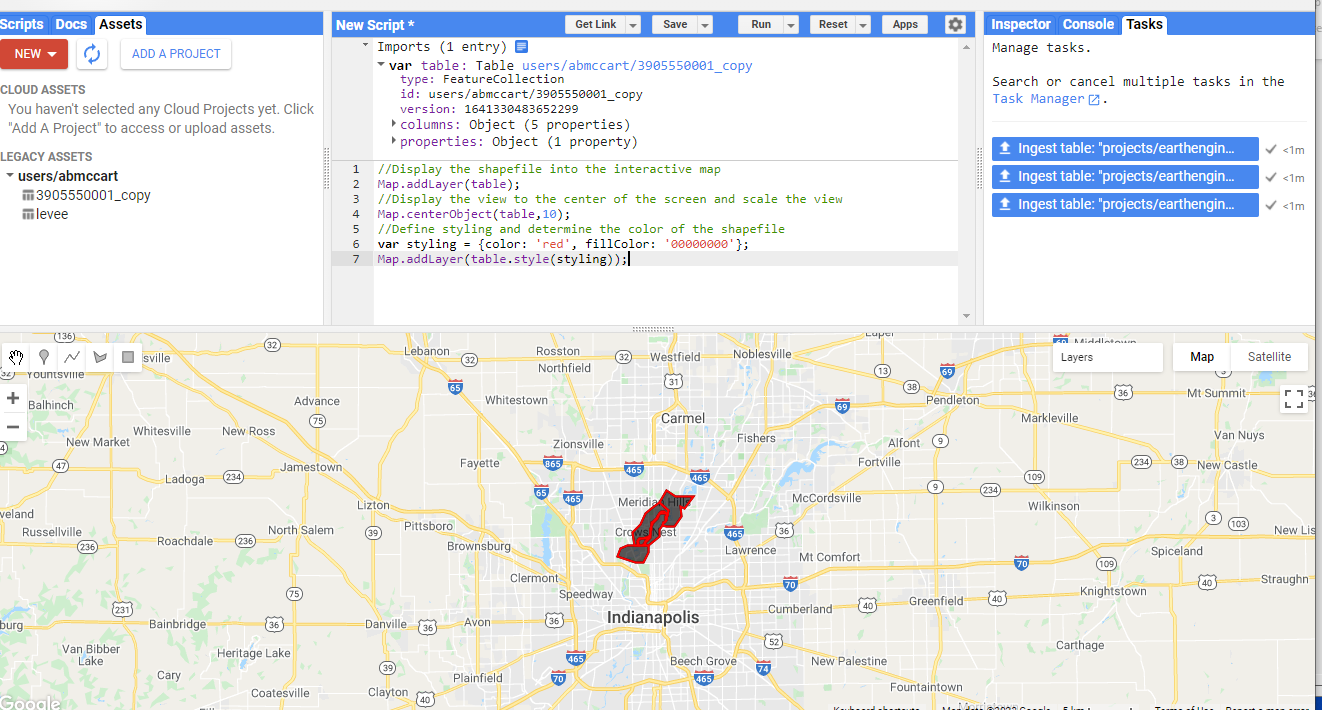

In [9]:
#using this tutorial: https://sryhandiniputeri.medium.com/input-a-shapefile-in-google-earth-engine-d358ced1d095
import IPython.display as display
from PIL import Image
display.display(Image.open('E:\\NLD_DSWE\\images\\first_levee_picture.png'))
#having multiple polygons is not an issue here. That may only be an issue on the Earth Explorer site.
#Now I will write code to load in the shapefile.

In [10]:
# ipyleaflet-based interactive map:
import geemap
Map = geemap.Map(center=[40,-100], zoom=4)

#To add additional basemaps to the Map:
Map.add_basemap('Esri Ocean')
    #Map.add_basemap('Esri National Geographic')

#To convert a shapefile to Earth Engine object and add it to the Map: https://geemap.org/usage/
levee = geemap.shp_to_ee('E:\\NLD_DSWE\\data\\RDME_Levees\\FullFinalLeveeList\\3905550001\\3905550001.shp')
Map.addLayer(levee, {}, 'Layer name')

In [23]:
# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

#Add Earth Engine layers. Load DEM file, “SRTM Digital Elevation Data 30m”:
dem = ee.Image('USGS/SRTMGL1_003')
Map.addLayer(dem, vis_params, 'SRTM DEM', True, 0.5)

#To center the map view around an Earth Engine object (larger number, larger object):
Map.centerObject(levee, 10)
Map

Map(bottom=49829.0, center=[39.86418725829286, -86.15704774488957], controls=(WidgetControl(options=['position…

# *Convert Javascript to Python* #
geemap.show_youtube('nAzZjKKd4w0')

In [13]:
js_snippet = """
// Dates should be within Landsat TM range (Aug 22, 1982 to present)
var startdate = ee.Date('1988-01-01');
var enddate = ee.Date('2018-12-31');
// ----------------------------------------------------------------------
// ----------------------------------------------------------------------
// Define AOI (var geometry)
var aoi = ee.FeatureCollection(geometry);
// ----------------------------------------------------------------------
// Load Landsat imagery 
// ----------------------------------------------------------------------
// Define Landsat surface reflectance bands
var sensor_band_dict = ee.Dictionary({
                        l8 : ee.List([1,2,3,4,5,6,10]),
                        l7 : ee.List([0,1,2,3,4,6,9]),
                        l5 : ee.List([0,1,2,3,4,6,9]),
                        l4 : ee.List([0,1,2,3,4,6,9])  
                        });
// Sensor band names corresponding to selected band numbers                        
var bandNames = ee.List(['blue','green','red','nir','swir1','swir2','pixel_qa']);
// ------------------------------------------------------
// Landsat 4 - Data availability Aug 22, 1982 - Dec 14, 1993
var ls4 = ee.ImageCollection('LANDSAT/LT04/C01/T1_SR')
              .filterBounds(aoi.geometry())
              .select(sensor_band_dict.get('l4'), bandNames); 

// ------------------------------------------------------
// Landsat 5 - Data availability Jan 1, 1984 - May 5, 2012
var ls5 = ee.ImageCollection('LANDSAT/LT05/C01/T1_SR')
              .filterBounds(aoi.geometry())
              .select(sensor_band_dict.get('l5'), bandNames); 
// Landsat 7 data are only used during operational SLC and
// to fill the gap between the end of LS5 and the beginning
// of LS8 data collection
// Prior to SLC-off            
// -------------------------------------------------------
// Landsat 7 - Data availability Jan 1, 1999 - Aug 9, 2016
// SLC-off after 31 May 2003
var ls7 = ee.ImageCollection('LANDSAT/LE07/C01/T1_SR') 
              .filterDate('1999-01-01', '2003-05-31') 
              .filterBounds(aoi.geometry())
              .select(sensor_band_dict.get('l7'), bandNames);
// Post SLC-off; fill the LS 5 gap
// -------------------------------------------------------
// Landsat 7 - Data availability Jan 1, 1999 - Aug 9, 2016
// SLC-off after 31 May 2003
var ls7_2 = ee.ImageCollection('LANDSAT/LE07/C01/T1_SR') 
              .filterDate('2012-05-05', '2014-04-11') 
              .filterBounds(aoi.geometry())
              .select(sensor_band_dict.get('l7'), bandNames);
// --------------------------------------------------------
// Landsat 8 - Data availability Apr 11, 2014 - present
var ls8 = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR')  
              .filterBounds(aoi.geometry())
              .select(sensor_band_dict.get('l8'), bandNames);
            
// Merge landsat collections
var l4578 = ee.ImageCollection(ls4
              .merge(ls5)
              .merge(ls7)
              .merge(ls7_2)
              .merge(ls8).sort('system:time_start'))
              .filterDate(startdate, enddate);
// ----------------------------------------------------------------------
// Mask clouds, cloud shadows, and snow
// ----------------------------------------------------------------------

// https://landsat.usgs.gov/sites/default/files/documents/ledaps_product_guide.pdf
function maskClouds(img) {
  var qa = img.select(['pixel_qa']);
  var clouds = qa.bitwiseAnd(8).neq(0).or // Cloud shadow (0 = clear, 1 = contamination)
              (qa.bitwiseAnd(16).neq(0)).or // Snow
              (qa.bitwiseAnd(32).neq(0)); // Cloud
  return img.addBands(clouds.rename('clouds')); // Add band of contaminated pixels
}
// Apply mask
var img_masked = l4578.map(maskClouds); //.map(function(img){return img.clip(aoi)});
// ----------------------------------------------------------------------
// Calculate hillshade mask
// ----------------------------------------------------------------------
function addHillshade(img) {
    var solar_azimuth = img.get('SOLAR_AZIMUTH_ANGLE');
    var solar_zenith = img.get('SOLAR_ZENITH_ANGLE'); // solar altitude = 90-zenith
    var solar_altitude = ee.Number(90).subtract(ee.Number(solar_zenith));
   return img.addBands(ee.Terrain.hillshade(dem, solar_azimuth, solar_altitude).rename('hillshade')); 
}
// Add hillshade bands
var img_hillshade = img_masked.map(addHillshade);
// ----------------------------------------------------------------------
// Calculate DSWE indices
// ----------------------------------------------------------------------
function addIndices(img){
// NDVI 
    img = img.addBands(img.normalizedDifference(['nir', 'red']).select([0], ['ndvi']));
// MNDWI (Modified Normalized Difference Wetness Index) = (Green - SWIR1) / (Green + SWIR1)
    img = img.addBands(img.normalizedDifference(['green', 'swir1']).select([0], ['mndwi']));
// MBSRV (Multi-band Spectral Relationship Visible) = Green + Red
    img = img.addBands(img.select('green').add(img.select('red')).select([0], ['mbsrv'])).toFloat();
// MBSRN (Multi-band Spectral Relationship Near-Infrared) = NIR + SWIR1
    img = img.addBands(img.select('nir').add(img.select('swir1')).select([0], ['mbsrn']).toFloat());
// AWEsh (Automated Water Extent Shadow) = Blue + (2.5 * Green) + (-1.5 * mbsrn) + (-0.25 * SWIR2)
    img = img.addBands(img.expression('blue + (2.5 * green) + (-1.5 * mbsrn) + (-0.25 * swir2)', {
         'blue': img.select('blue'),
         'green': img.select('green'),
         'mbsrn': img.select('mbsrn'),
         'swir2': img.select('swir2')
    }).select([0], ['awesh'])).toFloat();     
    return img;
}
// Add indices
var img_indices = img_hillshade.map(addIndices);
// ----------------------------------------------------------------------
// DSWE parameter testing
// ----------------------------------------------------------------------
// Bitmask of 11111 = 16 + 8 + 4 + 2 + 1 = 31 = 1F in hex 
// 1. ========== Function: test MNDWI ===========
// If (MNDWI > 0.124) set the ones digit (i.e., 00001)
function test_mndwi(img) {
  var mask = img.select('mndwi').gt(0.124);
  return img.addBands(mask
            .bitwiseAnd(0x1F)  
            .rename('mndwi_bit'));
}
// 2. ======== Function: compare MBSRV and MBSRN ========
// If (MBSRV > MBSRN) set the tens digit (i.e., 00010)
function test_mbsrv_mbsrn(img) {
  var mask = img.select('mbsrv').gt(img.select('mbsrn'));
  return img.addBands(mask
            .bitwiseAnd(0x1F) 
            .leftShift(1)  // shift left 1 space
            .rename('mbsrn_bit'));   
}
"""

In [32]:
#code to convert Javascript to Python
geemap.js_snippet_to_py(js_snippet, add_new_cell=True, import_ee=True, import_geemap=True, show_map=True)

NameError: name 'js_snippet' is not defined

# start of code #

In [35]:
import ee

# Dates should be within Landsat TM range (Aug 22, 1982 to present)
startdate = ee.Date('1988-01-01')
enddate = ee.Date('2018-12-31')
# ----------------------------------------------------------------------
# ----------------------------------------------------------------------
# Define AOI (geometry)
    #I set up a levee as the area of interest
aoi = ee.FeatureCollection(levee)
# ----------------------------------------------------------------------
# Load Landsat imagery
# ----------------------------------------------------------------------
# Define Landsat surface reflectance bands
        # Dictionary is an unordered collection of data values, like a map
        # Each key-value pair in a Dictionary is separated by a colon, each key is separated by a comma. Keys can be any data type. Keys are used to access values.
sensor_band_dict = ee.Dictionary({
                        'l8' : ee.List([1,2,3,4,5,6,10]),
                        'l7' : ee.List([0,1,2,3,4,6,9]),
                        'l5' : ee.List([0,1,2,3,4,6,9]),
                        'l4' : ee.List([0,1,2,3,4,6,9])
                        })
#print('ee.Dictionary from dictionary input:', ee.Dictionary(sensor_band_dict).getInfo())
Map.addLayer(aoi, {min: 0, max: 3000}, 'aoi', True, 0.5)
Map

Map(bottom=96687.0, center=[42.93732315127006, -98.89755249023439], controls=(WidgetControl(options=['position…

In [33]:
# Sensor band names corresponding to selected band numbers
bandNames = ee.List(['blue','green','red','nir','swir1','swir2','pixel_qa'])
#print(bandNames)

# Landsat 4 - Data availability Aug 22, 1982 - Dec 14, 1993
    #This one does not appear on map and is apparently zero bands?
ls4 = ee.ImageCollection('LANDSAT/LT04/C01/T1_SR') \
              .filterBounds(aoi.geometry()) \
              .select(sensor_band_dict.get('l4'), bandNames)
Map.addLayer(ls4, {min: 0, max: 3000}, 'ls4')
Map

Map(bottom=48628.0, center=[42.66628070564928, -98.71490478515626], controls=(WidgetControl(options=['position…

In [32]:
# ------------------------------------------------------
# Landsat 5 - Data availability Jan 1, 1984 - May 5, 2012
    #appears dark grey on map. Not sure why this is outside of aoi bounds.
ls5 = ee.ImageCollection('LANDSAT/LT05/C01/T1_SR') \
              .filterBounds(aoi.geometry()) \
              .select(sensor_band_dict.get('l5'), bandNames)
Map.addLayer(ls5, {min: 0, max: 3000}, 'ls5', True, 0.5)
Map

Map(bottom=48628.0, center=[42.66628070564928, -98.71490478515626], controls=(WidgetControl(options=['position…

In [36]:
# Landsat 7 data are only used during operational SLC and
# to fill the gap between the end of LS5 and the beginning
# of LS8 data collection
# Prior to SLC-off
# -------------------------------------------------------
# Landsat 7 - Data availability Jan 1, 1999 - Aug 9, 2016
# SLC-off after 31 May 2003
ls7 = ee.ImageCollection('LANDSAT/LE07/C01/T1_SR') \
              .filterDate('1999-01-01', '2003-05-31') \
              .filterBounds(aoi.geometry()) \
              .select(sensor_band_dict.get('l7'), bandNames)
# Post SLC-off; fill the LS 5 gap
# -------------------------------------------------------
# Landsat 7 - Data availability Jan 1, 1999 - Aug 9, 2016
# SLC-off after 31 May 2003
ls7_2 = ee.ImageCollection('LANDSAT/LE07/C01/T1_SR') \
              .filterDate('2012-05-05', '2014-04-11') \
              .filterBounds(aoi.geometry()) \
              .select(sensor_band_dict.get('l7'), bandNames)
# --------------------------------------------------------
# Landsat 8 - Data availability Apr 11, 2014 - present
ls8 = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
              .filterBounds(aoi.geometry()) \
              .select(sensor_band_dict.get('l8'), bandNames)

# Merge landsat collections
l4578 = ee.ImageCollection(ls4 \
              .merge(ls5) \
              .merge(ls7) \
              .merge(ls7_2) \
              .merge(ls8).sort('system:time_start')) \
              .filterDate(startdate, enddate)

In [14]:
# ----------------------------------------------------------------------
# Mask clouds, cloud shadows, and snow
# ----------------------------------------------------------------------
# https:#landsat.usgs.gov/sites/default/files/documents/ledaps_product_guide.pdf
def maskClouds(img):
    qa = img.select(['pixel_qa'])
    clouds = qa.bitwiseAnd(8).neq(0).Or # Cloud shadow (0 = clear, 1 = contamination)
    (qa.bitwiseAnd(16).neq(0)).Or # Snow
    (qa.bitwiseAnd(32).neq(0)); # Cloud
    return img.addBands(clouds('clouds')); # Add band of contaminated pixels

# Apply mask

def func_gdj(img): 
    return img.clip(aoi);
img_masked = l4578.map(maskClouds); #.map(function(img){return img.clip(aoi)}

# ----------------------------------------------------------------------
# Calculate hillshade mask
# ----------------------------------------------------------------------
def addHillshade(img):
    solar_azimuth = img.get('SOLAR_AZIMUTH_ANGLE')
    solar_zenith = img.get('SOLAR_ZENITH_ANGLE'); # solar altitude = 90-zenith
    solar_altitude = ee.Number(90).subtract(ee.Number(solar_zenith))
    return img.addBands(ee.Terrain.hillshade(dem, solar_azimuth, solar_altitude)).rename('hillshade')

# Add hillshade bands
img_hillshade = img_masked.map(addHillshade)
# ----------------------------------------------------------------------
# Calculate DSWE indices
# ----------------------------------------------------------------------
def addIndices(img):
# NDVI
    img = img.addBands(img.normalizedDifference(['nir', 'red']).select([0], ['ndvi']))
# MNDWI (Modified Normalized Difference Wetness Index) = (Green - SWIR1) / (Green + SWIR1)
    img = img.addBands(img.normalizedDifference(['green', 'swir1']).select([0], ['mndwi']))
# MBSRV (Multi-band Spectral Relationship Visible) = Green + Red
    img = img.addBands(img.select('green').add(img.select('red')).select([0], ['mbsrv'])).toFloat()
# MBSRN (Multi-band Spectral Relationship Near-Infrared) = NIR + SWIR1
    img = img.addBands(img.select('nir').add(img.select('swir1')).select([0], ['mbsrn']).toFloat())
# AWEsh (Automated Water Extent Shadow) = Blue + (2.5 * Green) + (-1.5 * mbsrn) + (-0.25 * SWIR2)
    img = img.addBands(img.expression('blue + (2.5 * green) + (-1.5 * mbsrn) + (-0.25 * swir2)', {
         'blue': img.select('blue'),
         'green': img.select('green'),
         'mbsrn': img.select('mbsrn'),
         'swir2': img.select('swir2')
    }).select([0], ['awesh'])).toFloat()
    return img

# Add indices
img_indices = img_hillshade.map(addIndices)
# ----------------------------------------------------------------------
# DSWE parameter testing
# ----------------------------------------------------------------------
# Bitmask of 11111 = 16 + 8 + 4 + 2 + 1 = 31 = 1F in hex
# 1. ========== Function: test MNDWI ===========
# If (MNDWI > 0.124) set the ones digit (i.e., 00001)
def test_mndwi(img):
    mask = img.select('mndwi').gt(0.124)
    return img.addBands(mask \
            .bitwiseAnd(0x1F) \
            .rename('mndwi_bit'))

# 2. ======== Function: compare MBSRV and MBSRN ========
# If (MBSRV > MBSRN) set the tens digit (i.e., 00010)
def test_mbsrv_mbsrn(img):
    mask = img.select('mbsrv').gt(img.select('mbsrn'))
    return img.addBands(mask \
            .bitwiseAnd(0x1F) \
            .leftShift(1) \
            .rename('mbsrn_bit'))

# 3. ======== Function: test AWEsh ========
# If (AWEsh > 0.0) set the hundreds digit (i.e., 00100)
def test_awesh(img):
    mask = img.select('awesh').gt(0.0)
    return img.addBands(mask \
              .bitwiseAnd(0x1F) \
              .leftShift(2) \
              .rename('awesh_bit'))
# 4. ======= Function: test PSW1 ========
# If (MNDWI > -0.44 && SWIR1 < 900 && NIR < 1500 & NDVI < 0.7) set the thousands digit (i.e., 01000)
def test_mndwi_swir1_nir(img):
    mask = img.select('mndwi').gt(-0.44) \
              .And(img.select('swir1').lt(900)) \
              .And(img.select('nir').lt(1500)) \
              .And(img.select('ndvi').lt(0.7))
    return img.addBands(mask \
            .bitwiseAnd(0x1F) \
            .leftShift(3) \
            .rename('swir1_bit'))

# 5. ======= Function: test PSW2 =========
# If (MNDWI > -0.5 && SWIR1 < 3000 && SWIR2 < 1000 && NIR < 2500 && Blue < 1000) set the ten-thousands digit (i.e., 10000)
def test_mndwi_swir2_nir(img):
    mask = img.select('mndwi').gt(-0.5) \
              .And(img.select('swir1').lt(3000)) \
              .And(img.select('swir2').lt(1000)) \
              .And(img.select('nir').lt(2500)) \
              .And(img.select('blue').lt(1000))
    return img.addBands(mask \
              .bitwiseAnd(0x1F) \
              .leftShift(4) \
              .rename('swir2_bit'))

# Add all bitwise bands to image collection
img_indices_bit = ee.ImageCollection(img_indices) \
              .map(test_mndwi) \
              .map(test_mbsrv_mbsrn) \
              .map(test_awesh) \
              .map(test_mndwi_swir1_nir) \
              .map(test_mndwi_swir2_nir)
# Function: consolidate individual bit bands
def sum_bit_bands(img):
    bands = img.select(['mndwi_bit', 'mbsrn_bit', 'awesh_bit', 'swir1_bit', 'swir2_bit'])
    summed_bands = bands.reduce(ee.Reducer.bitwiseOr())
    return img.addBands(summed_bands.rename('summed_bit_band'))

In [14]:
# Produce DSWE layers
# ----------------------------------------------------------------------
# Construct slope image from DEM
#dem = dem.clip(aoi); # removed clipping in an attempt to speed up script
slope = ee.Terrain.slope(dem)
# Convert binary code into 4 DSWE categories
def func_wfs(img):
    reclass = img.select('summed_bit_band').remap([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                            10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                            20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, 31],
                                           
                                            [0, 0, 0, 4, 0, 4, 4, 2, 0, 4,
                                             4, 2, 4, 2, 2, 1, 4, 4, 4, 2,
                                             4, 2, 2, 1, 3, 2, 2, 1, 2, 1,
                                             1, 1]).rename('dswe')

    # ID cloud-contaminated pixels
    reclass = reclass.where(img.select('clouds').eq(1), 9)
    # ID shaded areas
    reclass = reclass.where(img.select('hillshade').lte(110), 8)
    reclass = reclass.where(img.select('dswe')) == 4 and slope.gte == 5.71 or 0.1*slope == 5.71
    (img.select('dswe')) == 3 and slope.gte == 11.31 or 0.2*slope == 11.31
    (img.select('dswe')) == 2 and slope.gte == 16.7 or 0.3*slope == 16.7
    (img.select('dswe')) == 1 and slope.gte == 16.7,0 or 0.3*slope == 16.7
    return img.addBands(reclass).select('dswe');

In [15]:
### the code above runs, but this code below needs edits ###

In [15]:
#old code: 
img_indices_all = img_indices_bit.map(func_wfs)
#new try
#img_indices_all = img_indices_bit.map(func_wfs, ____need_iterable_here__)
# ID slopes

#my notes to figure this out:
#map() function applies the function to each iterable and returns a map object, 
    #map object is an iterator (meaning it can be looped over)
#about map() function
    #https://www.geeksforgeeks.org/python-map-function/?ref=lbp

EEException: Required argument (value) missing to function: Performs conditional replacement of values. For each pixel in each band of
'input', if the corresponding pixel in 'test' is nonzero, output the
corresponding pixel in value, otherwise output the input pixel. If at a
given pixel, either test or value is masked, the input value is used. If
the input is masked, nothing is done. The output bands have the same names
as the input bands. The output type of each band is the larger of the input
and value types. The output image retains the metadata and footprint of the
input image.

Args:
  input: The input image.
  test: The test image. The pixels of this image determines which
      of the input pixels is returned. If this is a single band, it
      is used for all bands in the input image. This may not be an
      array image.
  value: The output value to use where test is not zero. If this
      is a single band, it is used for all bands in the input
      image.

## just this one small piece of Java script will not translate to python ##

In [25]:
js_snippet = """
  reclass = reclass.where(img.select('dswe').eq(4) && slope.gte(5.71).or  // 10% slope = 5.71°
              (img.select('dswe').eq(3) && slope.gte(11.31)).or           // 20% slope = 11.31°
              (img.select('dswe').eq(2) && slope.gte(16.7)).or            // 30% slope = 16.7°
              (img.select('dswe').eq(1) && slope.gte(16.7)), 0);          // 30% slope = 16.7°
  return img.addBands(reclass).select('dswe');
});
"""

In [32]:
#code to convert Javascript to Python
geemap.js_snippet_to_py(js_snippet, add_new_cell=True, import_ee=True, import_geemap=True, show_map=True)

In [163]:
js_snippet = """
// ---------------------------------------------------------------------- 
// Create monthly composites
// ----------------------------------------------------------------------
// Generate sequence of months
var months_diff = enddate.difference(startdate, 'month'); // # of months between start and end
var months = ee.List.sequence(0, months_diff.int()); 
// Standardize start date to first of that month; i.e., 08-13-2000 --> 08-01-2000
var start_year = startdate.get('year');
var start_month = startdate.get('month');
var start_date = ee.Date.fromYMD(start_year, start_month, 1);
// Cycle through all months. Using a "min" reducer means that higher-confidence 
// water categories take precedence over lower/partial ones, while water or no-water categories 
// dominate cloudy pixels. Adding an empty band is necessary because GEE triggers
// an error if an image can't be returned, and in some months there are no
// images due to the gap between Landsat 5 and 8.
var dswe_ic = ee.ImageCollection.fromImages(months.map(function(m){
  var start = start_date.advance(m, 'month'); // Advance start date by m months
  var end = start.advance(1, 'month');        // End date is start month +1 
  return img_indices_all.filterDate(start, end) 
          .select(['dswe'])
          .reduce(ee.Reducer.min()) //  Produces band 'dswe_min'
          .set('date', start.format("YYYYMM")) // Sets yr/mo as property 'date'
          .cast({'dswe': 'uint8'})  // Adds empty band 'dswe'
          .remap([0,1,2,3,4,8,9], [0,1,2,3,4,9,9]).rename('dswe'); // remap takes the 1st band unless otherwise
                                                         // specified. If 'dswe_min' exists, that's the
                                                         // 1st one. If 'dswe' is the only band, it is
                                                         // converted to the same type as true min bands
                                                         // but is empty. In either case, a band is
                                                         // produced. 
}));                                             
// ----------------------------------------------------------------------
// Transform image collection to multi-band image for output
// ----------------------------------------------------------------------
function appendBand(current, previous){
  // Build a name for the band (here, "dswe_YYYYMM")
  var bandName = ee.Algorithms.String(current.bandNames().get(0)).cat('_').cat(current.get('date'));
  // Rename the band
  current = current.select([0], [bandName]);
  // Append it to the result (only returns current item on first element/iteration)
  var accum = ee.Algorithms.If(ee.Algorithms.IsEqual(previous, null), current, current.addBands(ee.Image(previous)));
  // Return the accumulation
  return accum;
}
// Iterate through the image collection
var dswe_i = ee.Image(dswe_ic.iterate(appendBand));
// ----------------------------------------------------------------------
// Export image
// ----------------------------------------------------------------------
  Export.image.toDrive({
    image: dswe_i, 
    description: 'DSWE2_1988_2018_Cambodia',
        scale: 30,
    crs: 'EPSG:4326',  // WGS 84
    maxPixels: 1e13,
    region: aoi.geometry().bounds(),
  });
// ----------------------------------------------------------------------
// Visualization of DSWE Image Products
// ----------------------------------------------------------------------
// Center on polygon
Map.centerObject(aoi, 10);
Map.addLayer(aoi, {}, 'aoi');
// Viz parameters: classes: 0, 1, 2, 3, 4, 9
var dswe_viz = {min:0, max: 9, palette: ['000000', '002ba1', '6287ec', '77b800', 'c1bdb6', '000000', '000000',
                                   '000000', '000000', 'ffffff']};
var ls_viz =  {bands: [ 'red', 'green', 'blue'], min:0, max:3000, gamma: [0.95, 1.1, 1]};
//var dswe_ic_firstImage = ee.Image(dswe_ic.first());
//Map.addLayer(dswe_ic_firstImage, dswe_viz_params_all, 'dswe_ic_firstImage');

// DSWE image (not composited)
Map.addLayer(ee.Image(img_indices_all.select('dswe').first()), dswe_viz, "DSWE");
// DSWE monthly composite image (from image collection)
Map.addLayer(dswe_ic.first().select('dswe'), dswe_viz, "DSWE composite");
// Landsat Data
Map.addLayer(ee.Image(img_indices.first()), ls_viz, 'Landsat');
"""

In [164]:
#code to convert Javascript to Python
geemap.js_snippet_to_py(js_snippet, add_new_cell=True, import_ee=True, import_geemap=True, show_map=True)

In [49]:
# Create monthly composites
# ----------------------------------------------------------------------
# Generate sequence of months
months_diff = enddate.difference(startdate, 'month'); # # of months between start and end
months = ee.List.sequence(0, months_diff.int())
# Standardize start date to first of that month; i.e., 08-13-2000 --> 08-01-2000
start_year = startdate.get('year')
start_month = startdate.get('month')
start_date = ee.Date.fromYMD(start_year, start_month, 1)
# Cycle through all months. Using a "min" reducer means that higher-confidence
# water categories take precedence over lower/partial ones, while water or no-water categories
# dominate cloudy pixels. Adding an empty band is necessary because GEE triggers
# an error if an image can't be returned, and in some months there are no
# images due to the gap between Landsat 5 and 8.

def func_siw(m):
    start = start_date.advance(m, 'month'); # Advance start date by m months
    end = start.advance(1, 'month');        # End date is start month +1
    return img_indices_all.filterDate(start, end) \
          .select(['dswe']) \
          .reduce(ee.Reducer.min()) \
          .set('date', start.format("YYYYMM")) \
          .cast({'dswe': 'uint8'}) \
          .remap([0,1,2,3,4,8,9], [0,1,2,3,4,9,9]).rename('dswe'); 
                                                         # specified. If 'dswe_min' exists, that's the
                                                         # 1st one. If 'dswe' is the only band, it is
                                                         # converted to the same type as True min bands
                                                         # but is empty. In either case, a band is
                                                         # produced.

dswe_ic = ee.ImageCollection.fromImages(months.map(func_siw))

# ----------------------------------------------------------------------
# Transform image collection to multi-band image for output
# ----------------------------------------------------------------------
def appendBand(current, previous):
  # Build a name for the band (here, "dswe_YYYYMM")
  bandName = ee.Algorithms.String(current.bandNames().get(0)).cat('_').cat(current.get('date'))
  # Rename the band
  current = current.select([0], [bandName])
  # Append it to the result (only returns current item on first element/iteration)
  accum = ee.Algorithms.If(ee.Algorithms.IsEqual(previous, {}), current, current.addBands(ee.Image(previous)))
  # Return the accumulation
  return accum

# Iterate through the image collection
dswe_i = ee.Image(dswe_ic.iterate(appendBand))
# ----------------------------------------------------------------------
# I took out the "Export image" code because I don't need it
# ----------------------------------------------------------------------
# Visualization of DSWE Image Products
# ----------------------------------------------------------------------
# Center on polygon
Map.centerObject(aoi, 10)
Map.addLayer(aoi, {}, 'aoi')
# Viz parameters: classes: 0, 1, 2, 3, 4, 9
dswe_viz = {'min':0, 'max': 9, 'palette': ['000000', '002ba1', '6287ec', '77b800', 'c1bdb6', '000000', '000000',
                                   '000000', '000000', 'ffffff']}
ls_viz =  {'bands': [ 'red',  'green',  'blue'], 'min':0, 'max':3000, 'gamma': [0.95, 1.1, 1]}
#dswe_ic_firstImage = ee.Image(dswe_ic.first())
#Map.addLayer(dswe_ic_firstImage, dswe_viz_params_all, 'dswe_ic_firstImage')

# DSWE image (not composited)
Map.addLayer(ee.Image(img_indices_all.select('dswe').first()), dswe_viz, "DSWE")
# DSWE monthly composite image (from image collection)
Map.addLayer(dswe_ic.first().select('dswe'), dswe_viz, "DSWE composite")
# Landsat Data
Map.addLayer(ee.Image(img_indices.first()), ls_viz, 'Landsat')
Map


NameError: name 'img_indices_all' is not defined

#### above contains the full Java script translated into python ####

In [ ]:
#create a Landsat timelapse animation and add it to the Map:
#Map.add_landsat_ts_gif(label='Place name', start_year=1985, bands=['NIR', 'Red', 'Green'], frames_per_second=5)

In [51]:
#dir('FeatureCollection')

In [ ]:
#calculate zonal statistics:
geemap.zonal_statistics(in_value_raster, in_zone_vector, out_file_path, statistics_type='MEAN')
#calculate zonal statistics by group:
#geemap.zonal_statistics_by_group(in_value_raster, in_zone_vector, out_file_path, statistics_type='SUM')

DSWE categories:  
> 0 - Not Water  
1 - Water - High Confidence  
2 - Water - Moderate Confidence  
3 - Partial Surface Water Pixel  
4 - Water or wetland, low confidence  
9 - Cloud, Cloud Shadow, or Snow (Hillshaded pixels set to 9 instead of 0)  
null - Fill (no data) ** currently left masked  

Notes: This script uses the WGS 84 projection (EPSG:4326

MNDWI
"The Modified Normalized Difference Water Index (MNDWI) uses green and SWIR bands for the enhancement of open water features. It also diminishes built-up area features that are often correlated with open water in other indices. MNDWI = (Green - SWIR) / (Green + SWIR)